## Description

Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

Each row must contain the digits 1-9 without repetition.
Each column must contain the digits 1-9 without repetition.
Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.
Note:

A Sudoku board (partially filled) could be valid but is not necessarily solvable.
Only the filled cells need to be validated according to the mentioned rules.


## Example 1:

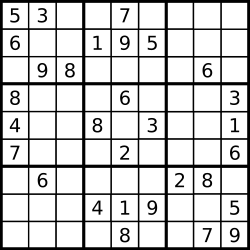

Input: board = 

[["5","3",".",".","7",".",".",".","."],

["6",".",".","1","9","5",".",".","."],

[".","9","8",".",".",".",".","6","."],

["8",".",".",".","6",".",".",".","3"],

["4",".",".","8",".","3",".",".","1"],

["7",".",".",".","2",".",".",".","6"],

[".","6",".",".",".",".","2","8","."],

[".",".",".","4","1","9",".",".","5"],

[".",".",".",".","8",".",".","7","9"]]

Output: true

## Example 2:

Input: board = 

[["8","3",".",".","7",".",".",".","."],

["6",".",".","1","9","5",".",".","."],

[".","9","8",".",".",".",".","6","."],

["8",".",".",".","6",".",".",".","3"],

["4",".",".","8",".","3",".",".","1"],

["7",".",".",".","2",".",".",".","6"],

[".","6",".",".",".",".","2","8","."],

[".",".",".","4","1","9",".",".","5"],

[".",".",".",".","8",".",".","7","9"]]

Output: false

Explanation: Same as Example 1, except with the 5 in the top left corner being modified to 8. Since there are two 8's in the top left 3x3 sub-box, it is invalid.

## Constraints:

board.length == 9

board[i].length == 9

board[i][j] is a digit 1-9 or '.'.

In [3]:
from __future__ import annotations #this was imported so that I could use built in types as generics. 
# Only >3.9 versions of python can use built in types as generics without this import.

In [4]:
# First accepted solution. Brute force method that goes about validating each row, column, and 3x3 matrix utilizing
# for loops and sets.

class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        for i in range(0, 9):
            set_columns = set()
            for y in board:
                if y[i] in set_columns and y[i]!='.':
                    return False
                elif y[i]!='.':
                    set_columns.add(y[i])
                    
                    # first nested loop time complexity of O(9^2)
        for i in board:
            set_rows = set()
            for y in range(0,9):
                if i[y] in set_rows and i[y]!='.':
                    return False
                elif i[y]!='.':
                    set_rows.add(i[y])
                    
                    # second nested loop same time complexity as first, O(9^2)
        set_square = {(0, 1, 2), (3, 4, 5),(6, 7, 8)}
        l, m, r = 0, 3, 6
        for i in set_square:
            set_left = set()
            set_mid = set()
            set_right = set()
            for yah in i:
                for y in range(3):
                    if board[yah][l+y] in set_left and board[yah][l+y]!='.':
                        return False
                    elif board[yah][l+y]!= '.':
                        set_left.add(board[yah][l+y])
                    if board[yah][m+y] in set_mid and board[yah][m+y]!='.':
                        return False
                    elif board[yah][m+y]!= '.':
                        set_mid.add(board[yah][m+y])
                    if board[yah][r+y] in set_right and board[yah][r+y]!='.':
                        return False
                    elif board[yah][r+y]!= '.':
                        set_right.add(board[yah][r+y])
        return True

In [5]:
# Second accepted solution. This one utilizes dictionaries containing sets to keep track of whether a given
# row/column/matrix is valid in a single nested loop. The matrix part is rather clever. It basically takes advantage
# of the fact that if you floor the row and column indices of a given base square on the board by 3, you get the 
# imaginary indices of the particular 3x3 matrix that this particular square belongs to. For example, if we're looking
# at a square in the position r = 1 and c = 2, we can see that it is part of the 3x3 matrix in the imaginary positions
# r_0 = 1//3 = 0 and c_0 = 2//3 = 0. A base square in the position r = 6 and c = 8 would be contained in the 3x3 matrix
# in the imaginary position of r_0 = 6//3 = 2, c_0 = 5//3 = 1.

#     __0__|__1__|__2___
#     1 2 3 4 5 6 7 8 9
#  | 0
# 0| 1
#  | 2
#  | 3
# 1| 4
#  | 5
#  | 6
# 2| 7
#  | 8

# By utilizing these imaginary r_0, c_0 index pairs as keys for our matrix dictionary, we can keep track of whether each
# one is valid. 

class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        rows = collections.defaultdict(set)
        columns = collections.defaultdict(set)
        matrices = collections.defaultdict(set) # where key is (r//3, c//3) tuple
        
        for r in range(9):
            for c in range(9):
                if board[r][c] == '.':
                    continue
                if board[r][c] in rows[r] or board[r][c] in columns[c] or board[r][c] in matrices[(r//3, c//3)]:
                    return False
                else:
                    rows[r].add(board[r][c])
                    columns[c].add(board[r][c])
                    matrices[(r//3, c//3)].add(board[r][c])
        return True